In [0]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
'''here we have extracted the csv file into the dataframe df
As per the dataframe we find that there are 6 feature variables namely
1)buying price whose values are vhigh, high, med, low.
2)price of the maintenance whose values are vhigh, high, med, low.
3)number of doors of the car whose  values are  two, three, 5more
4)capacity in terms of persons to carry whose values are two, four, 5more.
5)the size of luggage boot whose values are small, med, big
6)estimated safety of the car whose values are low, med, high.
using all these feature variables we need to predict the car_condition.
hence car_condition is the target or dependent variables whose values are 
Predictor Class i.e. unacc, acc, good, vgood
Needless to say that this is a classification type problem where Target variable is a categorical
variable.'''
df=pd.read_csv("Data Set.csv")
'''here we are snowballing the first five rows of the dataframe.'''
df.head(5)

'here we have extracted the csv file into the dataframe df\nAs per the dataframe we find that there are 5 feature variables namely\nbuying price whose values are vhigh, high, med, low.\nprice of the maintenance whose values are vhigh, high, med, low.\nnumber of doors of the car whose  values are  two, three, 5more\ncapacity in terms of persons to carry whose values are two, four, 5more.\nthe size of luggage boot whose values are small, med, big\nestimated safety of the car whose values are low, med, high.\nusing all these feature variables we need to predict the car_condition.\nhence car_condition is the target or dependent variables whose values are \nPredictor Class i.e. unacc, acc, good, vgood\nNeedless to say that this is a classification type problem where Target variable is a categorical\nvariable.'

'here we are snowballing the first five rows of the dataframe.'

,buying,maint,doors,persons,lug_boot,safety,car_condition
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


In [0]:
#here we are snowballing the last 5 rows of the dataframe
df.tail(5)

,buying,maint,doors,persons,lug_boot,safety,car_condition
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [0]:
'''as per the info we find that we have all variables as categorical variables 
and they all have no missing values as Non-Null count is 1728 for all the 7 variables
including the target variable i.e. car_condition'''
df.info()

'as per the info we find that we have all variables as categorical variables \nand they all have no missing values as Non-Null count is 1728 for all the 7 variables\nincluding the target variable i.e. car_condition'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   car_condition  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [0]:
pd.isnull(df).any()

buying           False
maint            False
doors            False
persons          False
lug_boot         False
safety           False
car_condition    False
dtype: bool

In [0]:
import pandas_profiling

In [0]:
eda_report=pandas_profiling.ProfileReport(df)
eda_report
eda_report.to_file("eda_report.html")
'''as per the EDA report we can find following details for variable buying:
Categorical :UNIFORM
Distinct count	4
Unique (%)	0.2%
Missing	0
Missing (%)	0.0%
Memory size	13.5 KiB
low	432
high	432
vhigh	432
med	432
following details for variable maint:
Categorical:UNIFORM
Distinct count	4
Unique (%)	0.2%
Missing	0
Missing (%)	0.0%
Memory size	13.5 KiB
low	432
high	432
vhigh	432
med	432
following details for variable doors:
Categorical:UNIFORM
Distinct count	4
Unique (%)	0.2%
Missing	0
Missing (%)	0.0%
Memory size	13.5 KiB
four	432
two	432
three	432
5more	432
following details for variable persons:
Categorical:UNIFORM
Distinct count	3
Unique (%)	0.2%
Missing	0
Missing (%)	0.0%
Memory size	13.5 KiB
four	576
two	576
more	576
following details for variable lug_boot:
CategoricalUNIFORM
Distinct count	3
Unique (%)	0.2%
Missing	0
Missing (%)	0.0%
Memory size	13.5 KiB
small	576
big	576
med	

similar details can be found from the EDA report for other variables as well.'''


In [0]:
'''DUMMY CODING USING THE LOOP STRUCTURE
here we need to do the conversion of categorical variables into 
numerical variables so that we can Build Models on top of that'''
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,car_condition
0,3,3,3,2,2,1,2
1,3,3,3,2,2,2,2
2,3,3,3,2,2,0,2
3,3,3,3,2,1,1,2
4,3,3,3,2,1,2,2


In [0]:
'''here we get some more details on the features and 
target variables existing in our dataframe'''
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car_condition
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,four,four,small,low,unacc
freq,432,432,432,576,576,576,1210


In [0]:
'''here we are finding the correlation among variables.we can find that none of them
are highly correlated among them.This will help us not encounter
multicollinearity between the independent variables
which will be  favourable  condition for Building a good model'''
x=df.corr()
x

,buying,maint,doors,persons,lug_boot,safety,car_condition
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.325368
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
car_condition,0.051424,0.040194,0.031327,0.325368,0.033184,-0.021044,1.000000


(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ff2c47b00>)

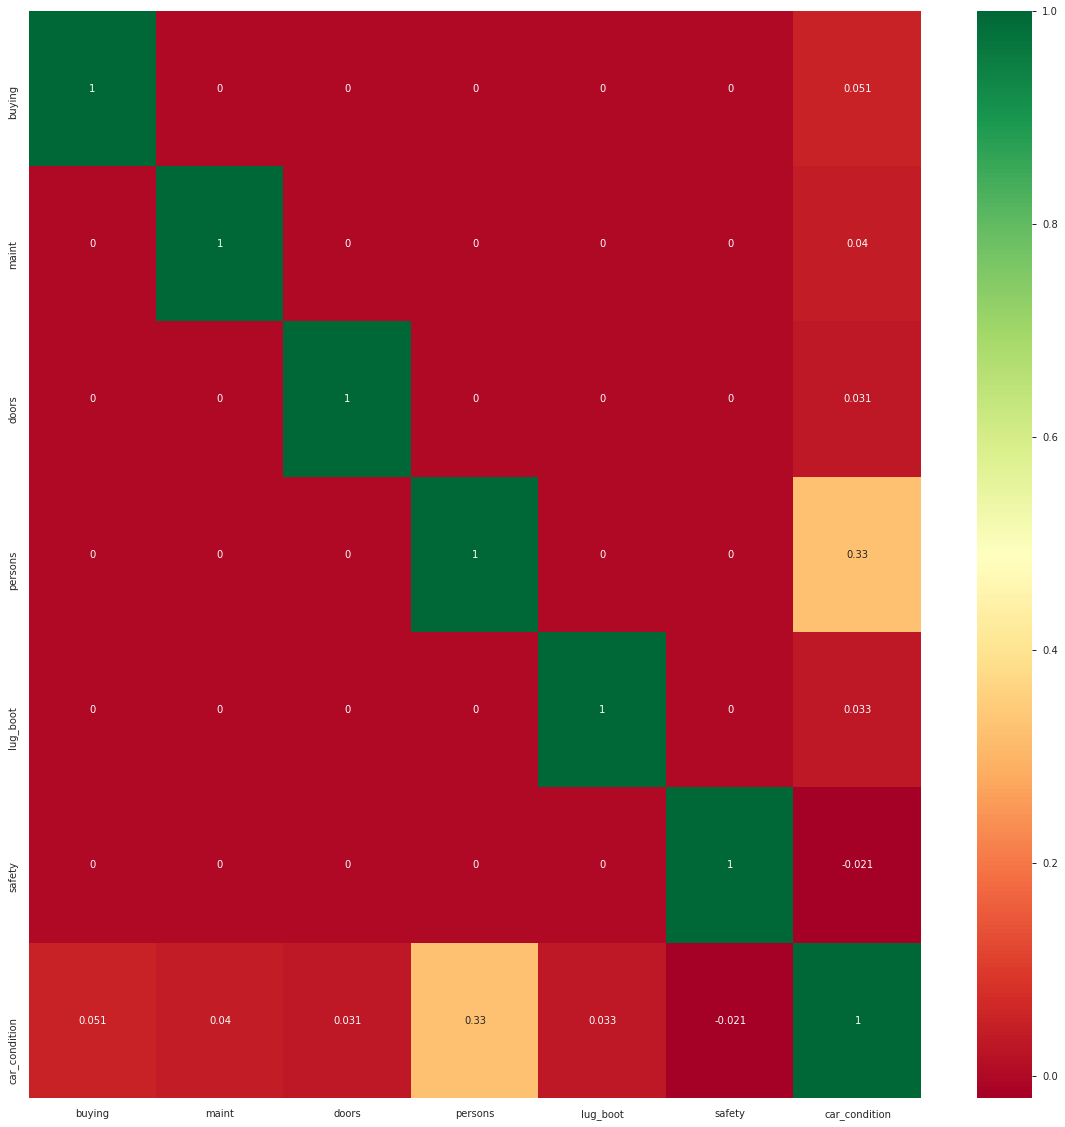

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ff5d27da0>)

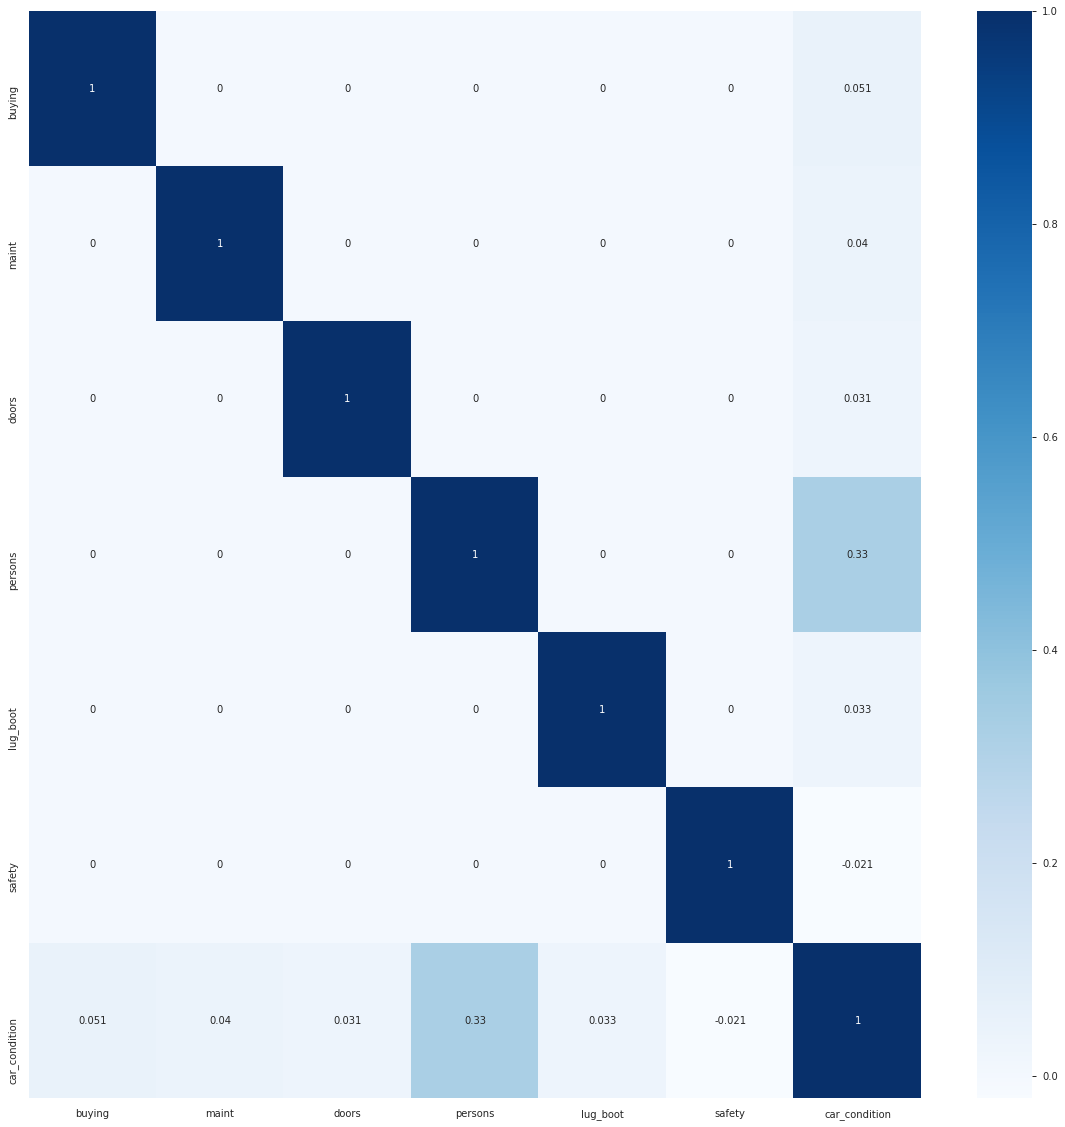

In [0]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='Blues',annot=True)
plt.show()

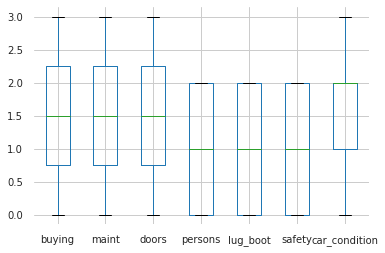

In [0]:
'''plotting box plot we find that none of them are having outliers
and width of the box plot is higher for persons,lug_boot and safetycar'''
df.boxplot()

In [0]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,car_condition
0,3,3,3,2,2,1,2
1,3,3,3,2,2,2,2
2,3,3,3,2,2,0,2
3,3,3,3,2,1,1,2
4,3,3,3,2,1,2,2


In [0]:
x=df.drop(['car_condition'],axis=1)
y=df['car_condition']

In [0]:
x.head(5)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,1
1,3,3,3,2,2,2
2,3,3,3,2,2,0
3,3,3,3,2,1,1
4,3,3,3,2,1,2


In [0]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: car_condition, dtype: int8

In [0]:
'''BUILD A LOGISTIC REGRESSION MODEL
create test and train data 70% and 30% split
initially we will build Logistic regression and find what is the accuracy'''
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)
lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight=None)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(1209, 6)

(519, 6)

(1209,)

(519,)

In [0]:
#FITTING A LOGISTIC REGRESSION MODEL
lmod.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [0]:
lmod.coef_

array([[-0.13165309, -0.1609304 , -0.15109124, -1.12477948, -0.21428554,
        -0.17731321],
       [-0.14517031, -0.05286446,  0.03529395, -0.77057339,  0.03523059,
         0.06126492],
       [ 0.17349975,  0.22342707,  0.18901377,  1.30106255,  0.41639522,
         0.54094518],
       [-0.05719263, -0.36010632, -0.28022609, -0.94009831, -1.19656754,
        -3.18872208]])

In [0]:
#GENERATE MODEL DIAGNOSTICS
classes=lmod.predict(test_x)
print(classes.size)

519


In [0]:
'''ACCUIRACY SCORE
we can see the accuracy is comming as 68.4 which is very low.so we will 
Build the model using Grid search and random forest now to find which is better'''
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.6840077071290944


In [0]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.44      0.19      0.27       124
           1       0.00      0.00      0.00        28
           2       0.72      0.93      0.81       355
           3       0.00      0.00      0.00        12

    accuracy                           0.68       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.59      0.68      0.62       519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
n_estimators=[10,500,100,2000]
criterion=['gini','entropy']
min_samples_split=[2,100,20,50,100]
max_depth=[20,30,40,50,None]
'''here we will be building the model using Random forest classifier
and take randomized search assistance in able to find the best model
here we will be using max depth one by one as 20,30,40,50
and also gini and entropy criterion to find the optimal model
also no.of times estimators used ois 10,500,100,2000
and min_samples split as 2,100,20,50,100
random forest will build models for all of them and then come up to tell
us which is the Best model built'''


In [0]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=1)
rf_g.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy, total=   0.0s
[CV] n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=50, max_depth=40, criterion=entropy, total=   0.0s
[CV] n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=100, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=500, min_samples_split=20, max_depth=40, criterion=gini 
[CV]  n_estimators=500, min_samples_split=20, max_depth=40, criterion=gini, total=   0.8s
[CV] n_estimators=500, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
#PREDICT USING THE TRAINED MODEL
predicted_values=rf_g.predict(x)
predicted_values

array([2, 2, 2, ..., 2, 1, 3], dtype=int8)

In [0]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))
'''here random forest build the model with accuaracy as 97.39'''

ACCUIRACY SCORE
0.9739583333333334


In [0]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       384
           1       1.00      0.58      0.73        69
           2       0.99      0.99      0.99      1210
           3       0.94      0.98      0.96        65

    accuracy                           0.97      1728
   macro avg       0.96      0.88      0.91      1728
weighted avg       0.98      0.97      0.97      1728



In [0]:
rf_g.best_estimator_
'''as per the random forest it came up the most optimized hyper parameters that can be utilized
for building the model which is the one as shown below'''

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_g.best_score_
'''random forest came up with the best score of 87.55 which is pretty high'''

0.8755868308620256

In [0]:
'''storing the results in test,csv'''
cv=pd.DataFrame(rf_g.cv_results_)

In [0]:
cv.to_csv("test.csv")

In [0]:
'''here we are trying to build the model with Grid search.the only difference here is 
that our cross validation cv=5. SO ENTIRE DATA IS USED FOR THE TRAINING SET AND 
THE ENTIRE DATA IS ALSO USED FOR THE TESTING SET. 
 
IN FIRST FOLD 1ST fraction of the 4 fractions used for testing set 
and other remaining data  used for Building the model. 
IN SECOND FOLD 2ND  fraction of the 4 fractions used for testing set and other remaining data  used 
for Building the model. IN THIRD FOLD 3RD  fraction of the 4 fractions used for testing set 
and other remaining data  used for Building the model. 
IN FOURTH FOLD 4TH  fraction of the 4 fractions used for testing set and 
other remaining data  used for Building the model. 
HENCE WE ARE LEARNING ON THE ENTIRE DATA AND VALIDATING ON THE ENTIRE DATA 
rather than splitting the data in to 70% used only for Building the model and 
30% used only for validating the Model. Hence this is quite a ROBUST MODEL.
param_grid--the parameters choosen are same as in Random forest.
Any time you want to optimize for the hyperparameters, 
Grid search will build all the different models 
internally and it will tell the best model settings as well. 
Even Grid search will have limitations and there will be huge cost if we want to build huge number of
Models.So computation power of CPU is direct infrastructure cost. 
Amount of time required to build the Model is huge. 
Here Randomized search is required to build the Model in place of GRID SEARCH. 
We need to build smaller subset of Models built in GRID SEARCH.Grid Search work on the concept of FFD
 i.e. full factorial Design i.e. each factor intersect with each other factor. 
PFD (Partial Factor Design) build a smaller subset of the model which is what 
exactly happens in Randomized search which is actually one of the advanced Machine Learning Models. '''


'here we are trying to build the model with Grid search.the only difference here is \nthat our cross validation cv=5. SO ENTIRE DATA IS USED FOR THE TRAINING SET AND \nTHE ENTIRE DATA IS ALSO USED FOR THE TESTING SET. \n \nIN FIRST FOLD 1ST fraction of the 4 fractions used for testing set \nand other remaining data  used for Building the model. \nIN SECOND FOLD 2ND  fraction of the 4 fractions used for testing set and other remaining data  used \nfor Building the model. IN THIRD FOLD 3RD  fraction of the 4 fractions used for testing set \nand other remaining data  used for Building the model. \nIN FOURTH FOLD 4TH  fraction of the 4 fractions used for testing set and \nother remaining data  used for Building the model. \nHENCE WE ARE LEARNING ON THE ENTIRE DATA AND VALIDATING ON THE ENTIRE DATA \nrather than splitting the data in to 70% used only for Building the model and \n30% used only for validating the Model. Hence this is quite a ROBUST MODEL.\nparam_grid--the parameters choosen a

In [117]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.model_selection import GridSearchCV
#BUILDING THE MODEL
mytreeone=RandomForestClassifier()
#CROSS VALIDATION TELLS HOW A MODEL PERFORMS ON A DATASET USING MULTIPLE SAMPLES OF TRAIN DATA
mytreeone_g=GridSearchCV(mytreeone,param_grid,cv=5,verbose=2,n_jobs=-1)
mytreeone_g.fit(x,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 15.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [118]:
mytreeone_g.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
mytreeone_g.best_score_

0.9369372539163944

In [120]:
#PREDICT USING THE TRAINED MODEL
predicted_values=mytreeone_g.predict(x)
predicted_values

array([2, 2, 2, ..., 2, 1, 3], dtype=int8)

In [121]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))

ACCUIRACY SCORE
1.0


In [123]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00      1210
           3       1.00      1.00      1.00        65

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728



In [124]:
!jupyter nbconvert AML_MODULE5_EXAM.ipynb

[NbConvertApp] Converting notebook AML_MODULE5_EXAM.ipynb to html
[NbConvertApp] Writing 1096200 bytes to AML_MODULE5_EXAM.html
